# Outlines
#### 1. Data cleaning
#### 2. feature engineering
#### 3. Getting more insights
#### 4. Data Pre-processing
      - Splitting  
      - fearure transformation
#### 5. modeling
#### 6. evalution

### Data description
| Attribute          | Description                                                             |
|--------------------|-------------------------------------------------------------------------|
| Name               | The brand and model of the car                                          |
| Location           | The location in which the car is being sold or is available for purchase|
| Year               | The year or edition of the model                                        |
| Kilometers_Driven  | The total kilometers driven in the car by the previous owner(s) in KM   |
| Fuel_Type          | The type of fuel used by the car                                        |
| Transmission       | The type of transmission used by the car                                |
| Owner_Type         | Whether the ownership is Firsthand, Second hand or other                |
| Mileage            | The standard mileage offered by the car company in kmpl or km/kg        |
| Engine             | The displacement volume of the engine in cc                             |
| Power              | The maximum power of the engine in bhp                                  |
| Seats              | The number of seats in the car                                          |
| New_Price          | Price of new model                                                      |
| Price              | The price of the used car in INR Lakhs                                  |


In [34]:
# Packages for EDA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.ensemble import IsolationForest


# Showing Plots inside notebook
# %matplotlib inline
# sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2) # Standard figure size for all

In [144]:
df = pd.read_csv("Data//train.csv")
df.sample(5)

Name    Location  Year  Kilometers_Driven  \
4707         Hyundai Grand i10 AT Asta   Hyderabad  2016              21000   
2545             Mahindra NuvoSport N8  Coimbatore  2017              37712   
365              Mini Clubman Cooper S        Pune  2017               8350   
410   Land Rover Range Rover 2.2L Pure  Coimbatore  2014              95649   
5134            Honda Brio S Option MT      Mumbai  2012              39566   

     Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
4707    Petrol    Automatic      First   18.9 kmpl  1197 CC     82 bhp    5.0   
2545    Diesel       Manual      First  17.45 kmpl  1493 CC    100 bhp    7.0   
365     Petrol       Manual      First   13.8 kmpl  1998 CC    192 bhp    5.0   
410     Diesel    Automatic      First   12.7 kmpl  2179 CC  187.7 bhp    5.0   
5134    Petrol       Manual     Second   18.4 kmpl  1198 CC   86.8 bhp    5.0   

       New_Price  Price  
4707         NaN   6.20  
2545  11.77 Lakh   7.57  
365   44.59 Lakh  35.00  
410          NaN  29.67  
5134         NaN   2.75

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [146]:
df.describe()

Year  Kilometers_Driven        Seats        Price
count  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   2013.358199       5.873838e+04     5.278735     9.479468
std       3.269742       9.126884e+04     0.808840    11.187917
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000

In [147]:
df["Engine"].str.split(" ").str[1].unique()

array(['CC', nan], dtype=object)

In [148]:
def clean_Engine (Engine):
    if pd.isna(Engine):
        return Engine
    else :
        return int(Engine.split(" ")[0])


df["Engine"] = df["Engine"].apply(clean_Engine)

In [149]:
df["Power"].str.split(" ").str[1].unique()

array(['bhp', nan], dtype=object)

In [150]:
df["Power"].str.split().str[-1].value_counts(dropna=False)

Power
bhp    5983
NaN      36
Name: count, dtype: int64

In [151]:
df[df['Power'] == 'null bhp']

Name   Location  Year  \
76                Ford Fiesta 1.4 SXi TDCi     Jaipur  2008   
79                  Hyundai Santro Xing XL  Hyderabad  2005   
89                  Hyundai Santro Xing XO  Hyderabad  2007   
120   Hyundai Santro Xing XL eRLX Euro III     Mumbai  2005   
143    Hyundai Santro Xing XO eRLX Euro II      Kochi  2008   
...                                    ...        ...   ...   
5873   Hyundai Santro Xing XO eRLX Euro II       Pune  2006   
5893                     Maruti Estilo LXI    Chennai  2008   
5925           Skoda Laura Classic 1.8 TSI       Pune  2010   
5943               Mahindra Jeep MM 540 DP    Chennai  2002   
5985                       Toyota Etios GD      Delhi  2013   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  Engine  \
76               111111    Diesel       Manual      First   17.8 kmpl  1399.0   
79                87591    Petrol       Manual      First    0.0 kmpl  1086.0   
89                73745    Petrol       Manual      First   17.0 kmpl  1086.0   
120              102000    Petrol       Manual     Second   17.0 kmpl  1086.0   
143               80759    Petrol       Manual      Third   17.0 kmpl  1086.0   
...                 ...       ...          ...        ...         ...     ...   
5873              47200    Petrol       Manual     Second   17.0 kmpl  1086.0   
5893              51000    Petrol       Manual     Second   19.5 kmpl  1061.0   
5925              85000    Petrol       Manual      First   17.5 kmpl  1798.0   
5943              75000    Diesel       Manual      First    0.0 kmpl  2112.0   
5985              70000    Diesel       Manual      First  23.59 kmpl  1364.0   

         Power  Seats New_Price  Price  
76    null bhp    5.0       NaN   2.00  
79    null bhp    5.0       NaN   1.30  
89    null bhp    5.0       NaN   2.10  
120   null bhp    5.0       NaN   0.85  
143   null bhp    5.0       NaN   1.67  
...        ...    ...       ...    ...  
5873  null bhp    5.0       NaN   1.20  
5893  null bhp    NaN       NaN   1.75  
5925  null bhp    5.0       NaN   2.85  
5943  null bhp    6.0       NaN   1.70  
5985  null bhp    5.0       NaN   3.88  

[107 rows x 13 columns]

In [152]:
def clean_Power (Power):
    if pd.isna(Power):
        return Power
    
    Power = Power.split(" ")[0]
    if Power == 'null':
        return np.nan

    else :
        return float(Power)

df["Power"] = df["Power"].apply(clean_Power)

In [153]:
df

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage  Engine   Power  Seats  \
0          CNG       Manual      First  26.6 km/kg   998.0   58.16    5.0   
1       Diesel       Manual      First  19.67 kmpl  1582.0  126.20    5.0   
2       Petrol       Manual      First   18.2 kmpl  1199.0   88.70    5.0   
3       Diesel       Manual      First  20.77 kmpl  1248.0   88.76    7.0   
4       Diesel    Automatic     Second   15.2 kmpl  1968.0  140.80    5.0   
...        ...          ...        ...         ...     ...     ...    ...   
6014    Diesel       Manual      First   28.4 kmpl  1248.0   74.00    5.0   
6015    Diesel       Manual      First   24.4 kmpl  1120.0   71.00    5.0   
6016    Diesel       Manual     Second   14.0 kmpl  2498.0  112.00    8.0   
6017    Petrol       Manual      First   18.9 kmpl   998.0   67.10    5.0   
6018    Diesel       Manual      First  25.44 kmpl   936.0   57.60    5.0   

      New_Price  Price  
0           NaN   1.75  
1           NaN  12.50  
2     8.61 Lakh   4.50  
3           NaN   6.00  
4           NaN  17.74  
...         ...    ...  
6014  7.88 Lakh   4.75  
6015        NaN   4.00  
6016        NaN   2.90  
6017        NaN   2.65  
6018        NaN   2.50  

[6019 rows x 13 columns]

In [154]:
indx = df[df['Power'] == 'null bhp'].index

In [155]:
df

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage  Engine   Power  Seats  \
0          CNG       Manual      First  26.6 km/kg   998.0   58.16    5.0   
1       Diesel       Manual      First  19.67 kmpl  1582.0  126.20    5.0   
2       Petrol       Manual      First   18.2 kmpl  1199.0   88.70    5.0   
3       Diesel       Manual      First  20.77 kmpl  1248.0   88.76    7.0   
4       Diesel    Automatic     Second   15.2 kmpl  1968.0  140.80    5.0   
...        ...          ...        ...         ...     ...     ...    ...   
6014    Diesel       Manual      First   28.4 kmpl  1248.0   74.00    5.0   
6015    Diesel       Manual      First   24.4 kmpl  1120.0   71.00    5.0   
6016    Diesel       Manual     Second   14.0 kmpl  2498.0  112.00    8.0   
6017    Petrol       Manual      First   18.9 kmpl   998.0   67.10    5.0   
6018    Diesel       Manual      First  25.44 kmpl   936.0   57.60    5.0   

      New_Price  Price  
0           NaN   1.75  
1           NaN  12.50  
2     8.61 Lakh   4.50  
3           NaN   6.00  
4           NaN  17.74  
...         ...    ...  
6014  7.88 Lakh   4.75  
6015        NaN   4.00  
6016        NaN   2.90  
6017        NaN   2.65  
6018        NaN   2.50  

[6019 rows x 13 columns]

In [156]:
df["Mileage"].str.split(" ").str[1].unique()


array(['km/kg', 'kmpl', nan], dtype=object)

In [157]:
# kmpl = km/kg * 1.4

def get_mileage_value (mileage_value):
    if pd.isna(mileage_value):
        return mileage_value
    
    value = float(mileage_value.split(" ")[0])
    unit = mileage_value.split(" ")[1]
    
    if unit == 'km/kg':
        value = value * 1.4
    return value


df['Mileage'] = df['Mileage'].apply(get_mileage_value)

In [158]:
df

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
0          CNG       Manual      First    37.24   998.0   58.16    5.0   
1       Diesel       Manual      First    19.67  1582.0  126.20    5.0   
2       Petrol       Manual      First    18.20  1199.0   88.70    5.0   
3       Diesel       Manual      First    20.77  1248.0   88.76    7.0   
4       Diesel    Automatic     Second    15.20  1968.0  140.80    5.0   
...        ...          ...        ...      ...     ...     ...    ...   
6014    Diesel       Manual      First    28.40  1248.0   74.00    5.0   
6015    Diesel       Manual      First    24.40  1120.0   71.00    5.0   
6016    Diesel       Manual     Second    14.00  2498.0  112.00    8.0   
6017    Petrol       Manual      First    18.90   998.0   67.10    5.0   
6018    Diesel       Manual      First    25.44   936.0   57.60    5.0   

      New_Price  Price  
0           NaN   1.75  
1           NaN  12.50  
2     8.61 Lakh   4.50  
3           NaN   6.00  
4           NaN  17.74  
...         ...    ...  
6014  7.88 Lakh   4.75  
6015        NaN   4.00  
6016        NaN   2.90  
6017        NaN   2.65  
6018        NaN   2.50  

[6019 rows x 13 columns]

# 1. Data cleaning


### 1.1 Investegation

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


In [160]:
missing_count = df.isna().sum()

missing_percentage = (missing_count / len(df)) * 100

nan_report = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing %": missing_percentage.round(2)
})

print(nan_report)


                   Missing Count  Missing %
Name                           0       0.00
Location                       0       0.00
Year                           0       0.00
Kilometers_Driven              0       0.00
Fuel_Type                      0       0.00
Transmission                   0       0.00
Owner_Type                     0       0.00
Mileage                        2       0.03
Engine                        36       0.60
Power                        143       2.38
Seats                         42       0.70
New_Price                   5195      86.31
Price                          0       0.00


In [161]:
df.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  6019.000000       6.019000e+03  6017.000000  5983.000000  5876.000000   
mean   2013.358199       5.873838e+04    18.242474  1621.276450   113.253050   
std       3.269742       9.126884e+04     4.879633   601.355233    53.874957   
min    1998.000000       1.710000e+02     0.000000    72.000000    34.200000   
25%    2011.000000       3.400000e+04    15.260000  1198.000000    75.000000   
50%    2014.000000       5.300000e+04    18.190000  1493.000000    97.700000   
75%    2016.000000       7.300000e+04    21.100000  1984.000000   138.100000   
max    2019.000000       6.500000e+06    46.956000  5998.000000   560.000000   

             Seats        Price  
count  5977.000000  6019.000000  
mean      5.278735     9.479468  
std       0.808840    11.187917  
min       0.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.640000  
75%       5.000000     9.950000  
max      10.000000   160.000000

In [162]:
df.duplicated().sum()

0

#### Notes
- Numerical values mixed with text in (Mileage, Engine, Power) columns.
    - in Milage column we have 2 units (kmpl & km/kg)
- Most of New_Price Column is null values (so, we have 2 solution.)
    - remove it or scrap some data to fill it.
- Null values values in other columns
- Seats columns have some values with Zero !!
- duplicated rows founded
- Power column have values "null bhp"

###  1.2 Working with data issues

> Dropping duplicated columns

In [163]:
# Remove duplicated row
df.drop_duplicates(inplace=True)

In [164]:
df.drop("New_Price", axis=1, inplace=True)

> Drop "New_Price" column because most of them is null


> Why did I choose to remove Null values and not to replace it ?
- That's simply because this columns need to be fixed and we cannot calculate any value before we fix it.
- another solution is to make a place holder and replace it after fixing data, (Your desicion id depende on the time)

In [165]:
df.dropna(inplace=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


#### values health checking

In [167]:
df.sample(5)

Name    Location  Year  \
2799  Mahindra Scorpio VLX 2.2 mHawk BSIII       Delhi  2010   
29     Toyota Innova 2.5 V Diesel 7-seater      Mumbai  2007   
3116                Hyundai i20 1.4 Sportz  Coimbatore  2019   
4447      Hyundai Grand i10 1.2 Kappa Asta       Kochi  2017   
1500                  Hyundai i20 Asta (o)       Delhi  2014   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Mileage  \
2799              72000    Diesel       Manual           First    12.05   
29               262000    Diesel       Manual  Fourth & Above    12.80   
3116              32251    Diesel       Manual           First    22.54   
4447              51223    Petrol       Manual           First    18.90   
1500              42365    Petrol       Manual           First    17.00   

      Engine   Power  Seats  Price  
2799  2179.0  120.00    8.0   4.40  
29    2494.0  102.00    7.0   4.00  
3116  1396.0   88.73    5.0   8.61  
4447  1197.0   81.86    5.0   5.66  
1500  1197.0   80.00    5.0   5.50

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


___________________________________

# 2. Feature Engineering

In [169]:
# Check Name column uniques
df["Name"].nunique()

1811

In [170]:
print("Percentage of uniques",round(df["Name"].nunique()/df.shape[0]*100),"%")

Percentage of uniques 31 %


>  "Name" feature has no affect that's because it has so many unique values
- So let's make it useful and impactful

In [171]:
df["Name"]

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 5872, dtype: object

> We can notice that the first word of the name is (Brand), so let's get it

In [172]:
df["Brand"] = df["Name"].apply(lambda x : x.split()[0])

In [173]:
df["Brand"].nunique()

30

- A huge difference here, From this columns we can make a big affect.

> Another observation that first two word can express wich car we want.
- So, let's change name column with just first 2 words.

In [174]:
df["Name"] = df["Name"].apply(lambda x : " ".join(x.split()[:2]))

In [175]:
df["Name"].nunique()

207

- That's great, Now we can make an affect with name column.

In [176]:
df = df.convert_dtypes()

________________________

In [177]:
df.sample(5)

Name Location  Year  Kilometers_Driven Fuel_Type Transmission  \
4484    Skoda Laura   Mumbai  2010              95000    Diesel       Manual   
1677  Hyundai Grand    Delhi  2017              12248    Petrol       Manual   
2822          BMW 3     Pune  2018              24000    Diesel    Automatic   
2624  Hyundai Grand    Kochi  2015              66337    Diesel       Manual   
4797    Hyundai i20  Chennai  2011              47000    Petrol       Manual   

     Owner_Type  Mileage  Engine  Power  Seats  Price    Brand  
4484     Second     17.0    1896  105.0      5   3.25    Skoda  
1677      First     18.9    1197  81.86      5    4.9  Hyundai  
2822      First    18.88    1995  184.0      5   28.0      BMW  
2624      First     24.0    1120   70.0      5   4.96  Hyundai  
4797      First     17.0    1197   80.0      5    4.5  Hyundai

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   string 
 1   Location           5872 non-null   string 
 2   Year               5872 non-null   Int64  
 3   Kilometers_Driven  5872 non-null   Int64  
 4   Fuel_Type          5872 non-null   string 
 5   Transmission       5872 non-null   string 
 6   Owner_Type         5872 non-null   string 
 7   Mileage            5872 non-null   Float64
 8   Engine             5872 non-null   Int64  
 9   Power              5872 non-null   Float64
 10  Seats              5872 non-null   Int64  
 11  Price              5872 non-null   Float64
 12  Brand              5872 non-null   string 
dtypes: Float64(3), Int64(4), string(6)
memory usage: 682.4 KB


In [179]:
df.describe()

Year  Kilometers_Driven    Mileage       Engine       Power  \
count       5872.0             5872.0     5872.0       5872.0      5872.0   
mean   2013.477691       58316.999149  18.386848  1625.745572  113.276894   
std       3.164568       92169.410006   4.680325   601.641783   53.881892   
min         1998.0              171.0        0.0        624.0        34.2   
25%         2012.0            33422.5      15.29       1198.0        75.0   
50%         2014.0            52609.0      18.33       1495.5        97.7   
75%         2016.0           72402.75       21.1       1991.0       138.1   
max         2019.0          6500000.0     46.956       5998.0       560.0   

          Seats      Price  
count    5872.0     5872.0  
mean   5.283719   9.603919  
std    0.805081  11.249453  
min         2.0       0.44  
25%         5.0     3.5175  
50%         5.0       5.75  
75%         5.0       10.0  
max        10.0      160.0

________________________

# 3. Data understanding

### 3.1 Univariate analysis

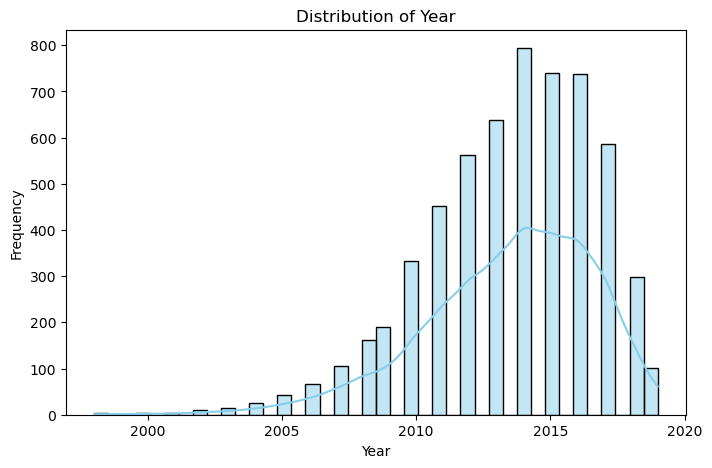

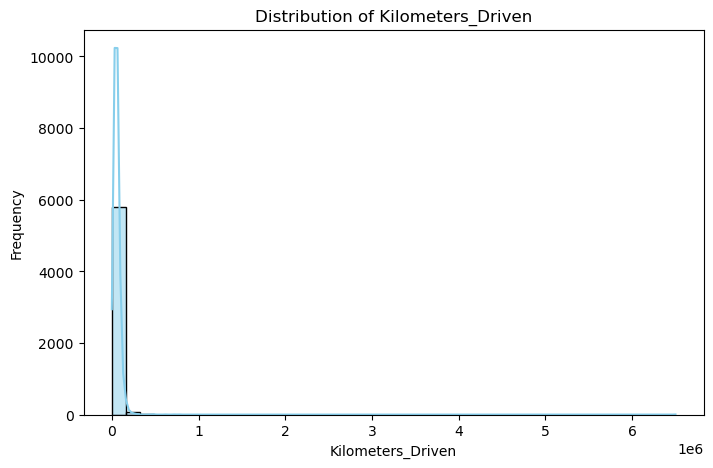

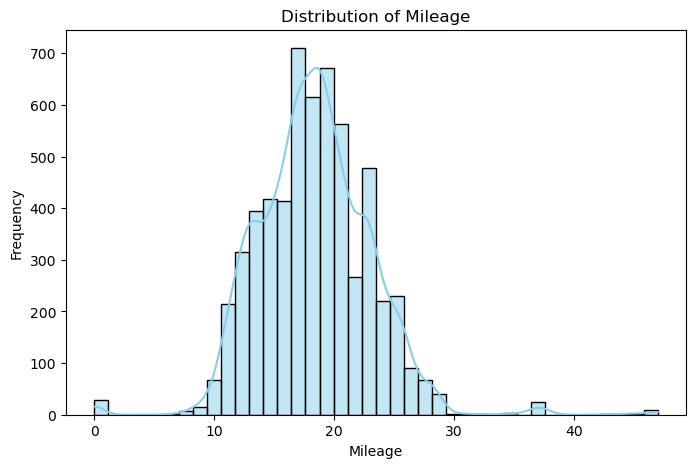

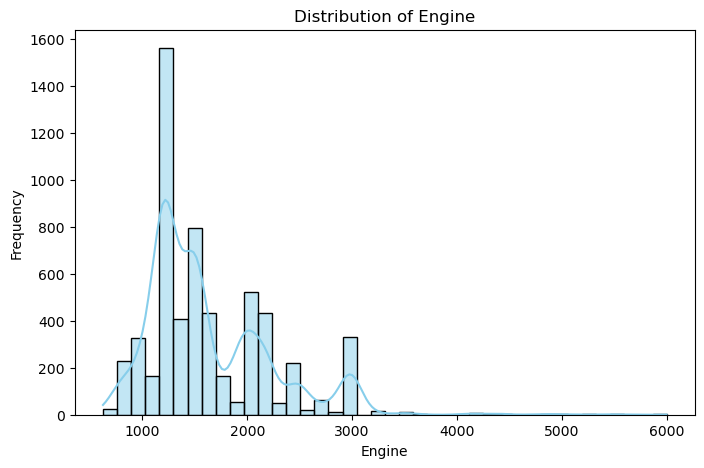

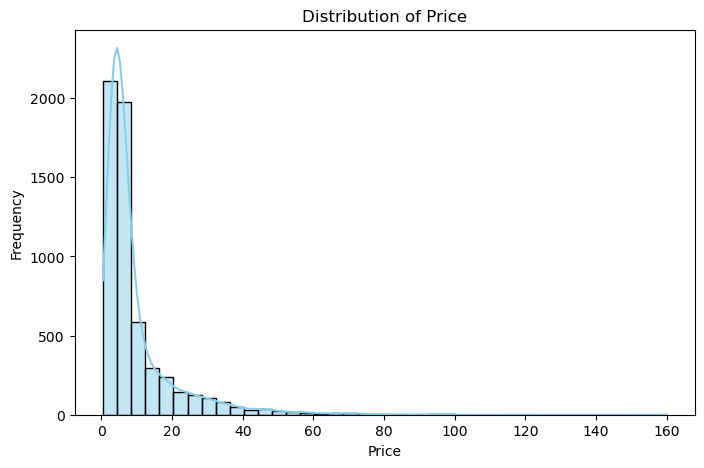

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','Price']

for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=40, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

C:\Users\baraa\AppData\Local\Temp\ipykernel_30760\3984056248.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




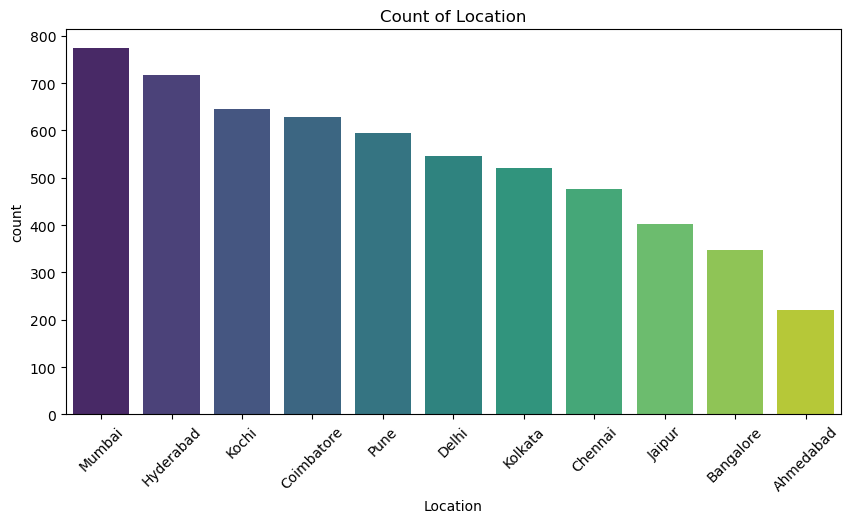

C:\Users\baraa\AppData\Local\Temp\ipykernel_30760\3984056248.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




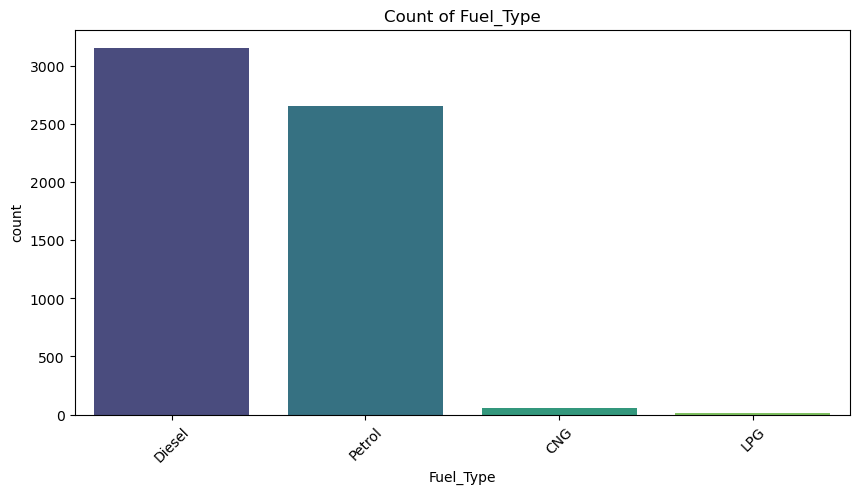

C:\Users\baraa\AppData\Local\Temp\ipykernel_30760\3984056248.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




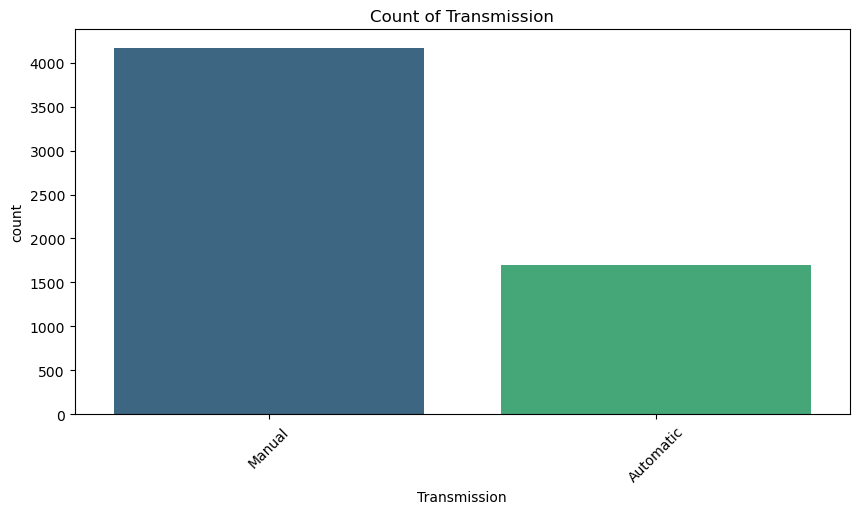

C:\Users\baraa\AppData\Local\Temp\ipykernel_30760\3984056248.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




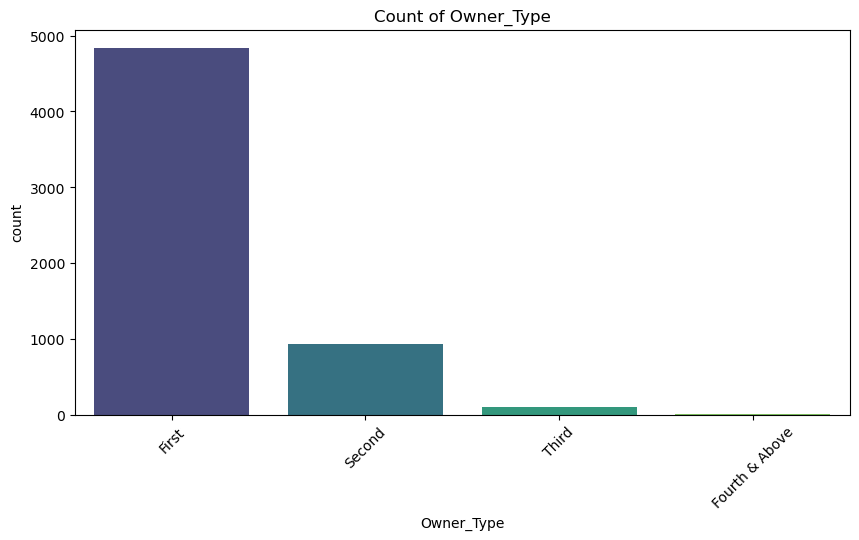

C:\Users\baraa\AppData\Local\Temp\ipykernel_30760\3984056248.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




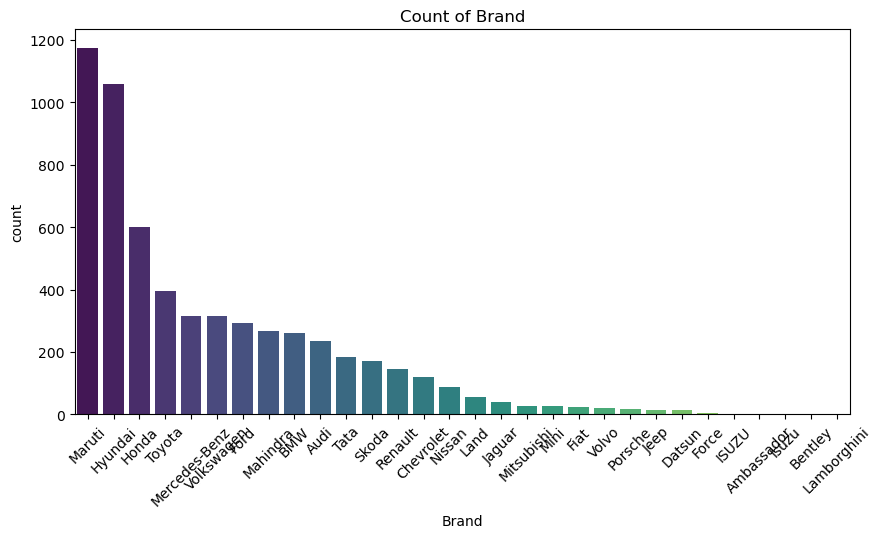

In [182]:
# ========== 3.2 Categorical Analysis ==========
categorical_cols = ['Location','Fuel_Type','Transmission','Owner_Type','Brand']

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, order=order, palette="viridis")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


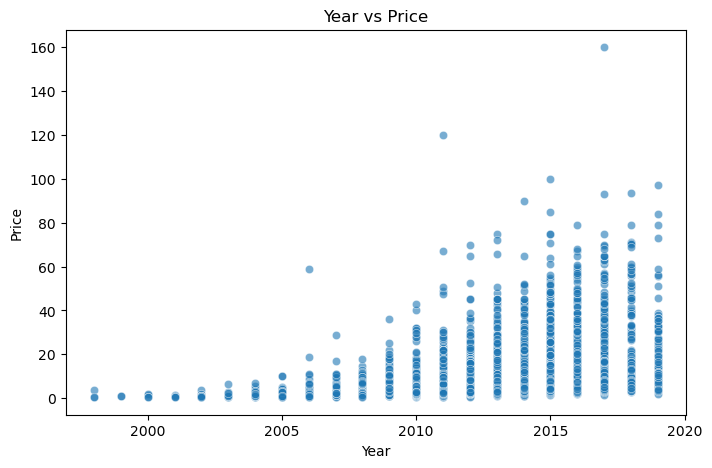

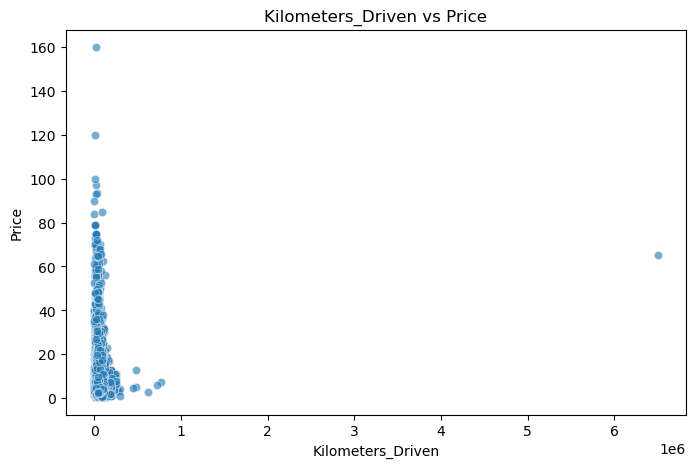

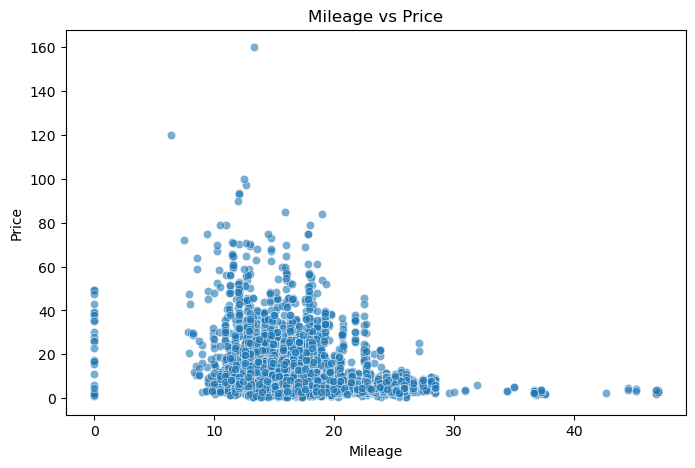

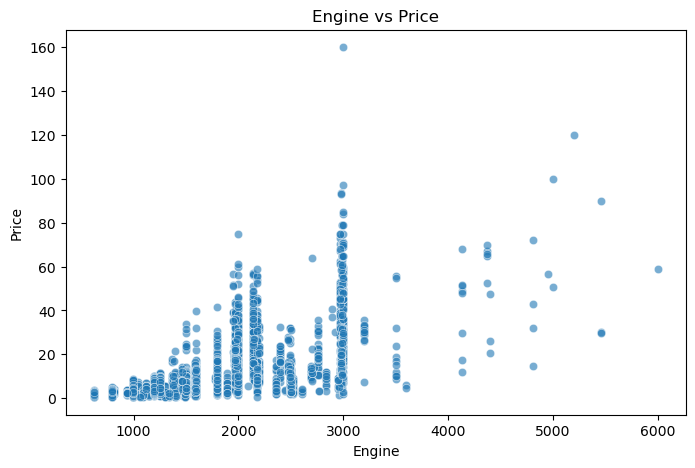

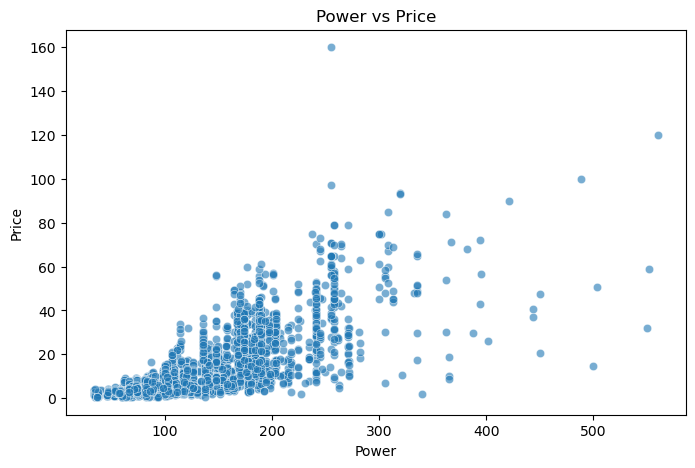

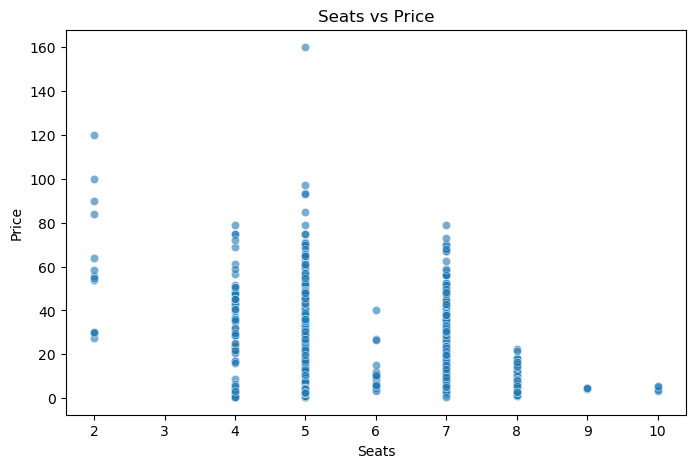

In [183]:
# ========== 3.4 Bivariate Analysis ==========
# Price vs Numerical
for col in ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[col], y=df['Price'], alpha=0.6)
    plt.title(f"{col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()


# Remove Outliers to check data distribution

In [81]:
df_visual = df.copy()

In [82]:
df_visual

Name    Location  Year  Kilometers_Driven Fuel_Type  \
0       Maruti Wagon      Mumbai  2010              72000       CNG   
1      Hyundai Creta        Pune  2015              41000    Diesel   
2         Honda Jazz     Chennai  2011              46000    Petrol   
3      Maruti Ertiga     Chennai  2012              87000    Diesel   
4            Audi A4  Coimbatore  2013              40670    Diesel   
...              ...         ...   ...                ...       ...   
6014    Maruti Swift       Delhi  2014              27365    Diesel   
6015   Hyundai Xcent      Jaipur  2015             100000    Diesel   
6016   Mahindra Xylo      Jaipur  2012              55000    Diesel   
6017    Maruti Wagon     Kolkata  2013              46000    Petrol   
6018  Chevrolet Beat   Hyderabad  2011              47000    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price      Brand  
0          Manual      First    37.24     998  58.16      5   1.75     Maruti  
1          Manual      First    19.67    1582  126.2      5   12.5    Hyundai  
2          Manual      First     18.2    1199   88.7      5    4.5      Honda  
3          Manual      First    20.77    1248  88.76      7    6.0     Maruti  
4       Automatic     Second     15.2    1968  140.8      5  17.74       Audi  
...           ...        ...      ...     ...    ...    ...    ...        ...  
6014       Manual      First     28.4    1248   74.0      5   4.75     Maruti  
6015       Manual      First     24.4    1120   71.0      5    4.0    Hyundai  
6016       Manual     Second     14.0    2498  112.0      8    2.9   Mahindra  
6017       Manual      First     18.9     998   67.1      5   2.65     Maruti  
6018       Manual      First    25.44     936   57.6      5    2.5  Chevrolet  

[5872 rows x 13 columns]

In [83]:
# df_target =

In [84]:
numerical_cols = ['Kilometers_Driven' , 'Mileage' , 'Engine' , 'Power','Price']

In [85]:
numerical_cols

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

In [86]:
# df = df[numerical_cols]

In [87]:
# Initialize Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)

# Fit the model and predict outliers
outliers = clf.fit_predict(df[numerical_cols])

# Create a mask for the outliers
outlier_mask = outliers == -1
#This line creates a boolean mask where `True` indicates the presence of an outlier
#(value of -1 in the `outliers` array) and `False` indicates a non-outlier.
# Extract the outliers DataFrame
df_inliers = df[~outlier_mask]  #containing the rows where the `outlier_mask` is False
df_outliers = df[outlier_mask] #containing the rows where the `outlier_mask` is True.

In [88]:
df_outliers

Name    Location  Year  Kilometers_Driven Fuel_Type  \
0              Maruti Wagon      Mumbai  2010              72000       CNG   
14               Land Rover        Pune  2012              85000    Diesel   
29            Toyota Innova      Mumbai  2007             262000    Diesel   
38    Mercedes-Benz M-Class        Pune  2013              85000    Diesel   
41                Tata Nano       Kochi  2014              19698    Petrol   
...                     ...         ...   ...                ...       ...   
5957             Honda City  Coimbatore  2004             186679    Petrol   
5997           Maruti Wagon      Jaipur  2010              70000       LPG   
6006  Mercedes-Benz M-Class      Mumbai  2009             102002    Diesel   
6008       Porsche Panamera   Hyderabad  2013              40000    Diesel   
6011           Skoda Superb   Hyderabad  2009              53000    Petrol   

     Transmission      Owner_Type  Mileage  Engine   Power  Seats  Price  \
0          Manual           First    37.24     998   58.16      5   1.75   
14      Automatic          Second      0.0    2179   115.0      5   17.5   
29         Manual  Fourth & Above     12.8    2494   102.0      7    4.0   
38      Automatic           First    11.74    2987   254.8      5   28.0   
41         Manual           First     25.4     624    37.5      4   1.53   
...           ...             ...      ...     ...     ...    ...    ...   
5957       Manual          Second     13.0    1493   100.0      5   1.76   
5997       Manual           First    36.68     998    58.2      5   2.27   
6006    Automatic           First      8.7    2987  224.34      5  10.75   
6008    Automatic          Second    17.85    2967   300.0      4   45.0   
6011    Automatic           First      0.0    3597   262.6      5   4.75   

              Brand  
0            Maruti  
14             Land  
29           Toyota  
38    Mercedes-Benz  
41             Tata  
...             ...  
5957          Honda  
5997         Maruti  
6006  Mercedes-Benz  
6008        Porsche  
6011          Skoda  

[588 rows x 13 columns]

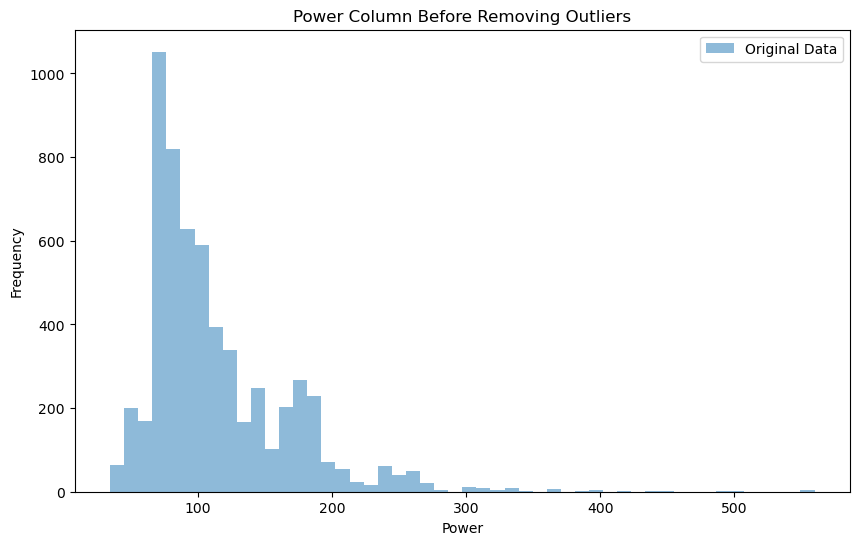

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
plt.figure(figsize=(10, 6))
plt.hist(df['Power'], bins=50, alpha=0.5, label='Original Data')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title('Power Column Before Removing Outliers')
plt.legend()
plt.show()

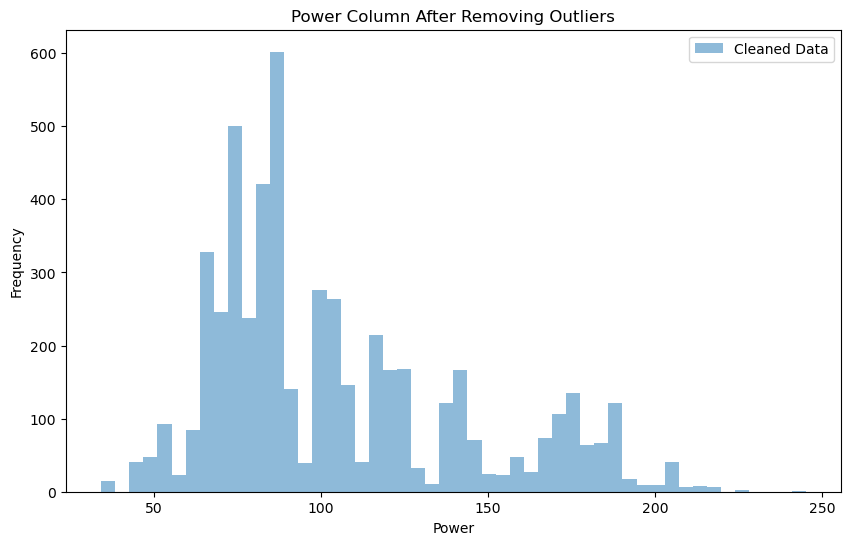

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(df_inliers['Power'], bins=50, alpha=0.5, label='Cleaned Data')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title('Power Column After Removing Outliers')
plt.legend()
plt.show()


### 3.2 Univariate analysis

- year
- kilometers
- transmission
- brand

## Data summery :
    - Numerical columns follow the gussian distribution, but have Outliers
    (My desicion is not to remove it,because it will ne useful)
    - The countrt with the most sales spread is `Mumbai` and the least is `Ahmedabad`
    - Most of cars is form 2010 and 2015

In [93]:
df.sample()

Name Location  Year  Kilometers_Driven Fuel_Type Transmission  \
4918  Ford Ecosport  Chennai  2013              55000    Petrol       Manual   

     Owner_Type  Mileage  Engine  Power  Seats  Price Brand  
4918     Second     15.8    1499  110.0      5    5.2  Ford

________________________

# 4. Data pre-processing

### 4.1 Data splitting

In [94]:
# define dataset
X, y = df.drop("Price",axis=1) , df["Price"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [95]:
X_train

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5975      Hyundai i20  Coimbatore  2017              14618    Petrol   
4117          Audi Q5   Bangalore  2015              63000    Diesel   
1727   Chevrolet Aveo        Pune  2007              59000    Petrol   
4310       Tata Manza      Jaipur  2011              86500    Diesel   
2483    Toyota Innova       Delhi  2011              72000    Diesel   
...               ...         ...   ...                ...       ...   
935    Renault Duster      Jaipur  2015              91000    Diesel   
5325     Maruti Swift       Kochi  2016              65210    Diesel   
4088    Skoda Octavia   Hyderabad  2015             122086    Diesel   
244     Toyota Innova      Mumbai  2014             118000    Diesel   
5290  Volkswagen Polo   Hyderabad  2016              29647    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats       Brand  
5975       Manual      First     18.6    1197  81.83      5     Hyundai  
4117    Automatic      First    14.16    1968  174.3      5        Audi  
1727       Manual      Third    15.26    1150   74.9      5   Chevrolet  
4310       Manual     Second    21.12    1248   88.8      5        Tata  
2483       Manual      First     12.8    2494  102.0      7      Toyota  
...           ...        ...      ...     ...    ...    ...         ...  
935        Manual      First    19.87    1461   83.8      5     Renault  
5325       Manual      First     22.9    1248   74.0      5      Maruti  
4088    Automatic      First     19.3    1968  141.0      5       Skoda  
244        Manual      First     12.8    2494  102.0      7      Toyota  
5290       Manual      First    20.14    1498   88.0      5  Volkswagen  

[4404 rows x 12 columns]

In [96]:
X_test

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5495          Hyundai Creta      Mumbai  2015              26000    Diesel   
2228          Maruti Ertiga      Mumbai  2016              65263       CNG   
2150        Mahindra XUV500  Coimbatore  2016              67472    Diesel   
664           Hyundai Verna      Jaipur  2008             170000    Diesel   
570              Honda City     Kolkata  2011              42086    Petrol   
...                     ...         ...   ...                ...       ...   
1799  Mercedes-Benz E-Class   Bangalore  2013              29000    Diesel   
4154           Maruti Swift   Bangalore  2012              62000    Diesel   
725              Skoda Yeti      Jaipur  2016              84000    Diesel   
850           Toyota Innova        Pune  2017              43200    Diesel   
3262           Maruti Swift      Jaipur  2014              75074    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats          Brand  
5495    Automatic      First    17.01    1582  126.2      5        Hyundai  
2228       Manual      First     24.5    1373  80.46      7         Maruti  
2150       Manual      First     16.0    2179  140.0      7       Mahindra  
664        Manual     Second     16.8    1493  110.0      5        Hyundai  
570        Manual      First     17.0    1497  118.0      5          Honda  
...           ...        ...      ...     ...    ...    ...            ...  
1799    Automatic      First    14.21    2143  203.0      5  Mercedes-Benz  
4154       Manual      First     17.8    1248   75.0      5         Maruti  
725        Manual      First    17.72    1968  108.5      5          Skoda  
850        Manual      First    13.68    2393  147.8      7         Toyota  
3262       Manual      First     23.4    1248   74.0      5         Maruti  

[1468 rows x 12 columns]

> Why I have started with splliting data  ?
- That's to avoid data leakage problem.

### 4.2 Data transformation

#### 4.2.1 Numerical transformation

In [97]:
from sklearn.preprocessing import RobustScaler

In [98]:
Numerical_data = ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']

In [99]:
# define the scaler
scaler = RobustScaler() #used IQR insted var & std for outliers
# fit on the training dataset
scaler.fit(X_train[Numerical_data])
# scale the training dataset
X_train[Numerical_data] = scaler.transform(X_train[Numerical_data])
# scale the test dataset
X_test[Numerical_data] = scaler.transform(X_test[Numerical_data])

In [100]:
X_train

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5975      Hyundai i20  Coimbatore  0.75          -0.982777    Petrol   
4117          Audi Q5   Bangalore  0.25           0.274062    Diesel   
1727   Chevrolet Aveo        Pune -1.75           0.170152    Petrol   
4310       Tata Manza      Jaipur -0.75           0.884530    Diesel   
2483    Toyota Innova       Delhi -0.75           0.507858    Diesel   
...               ...         ...   ...                ...       ...   
935    Renault Duster      Jaipur  0.25           1.001429    Diesel   
5325     Maruti Swift       Kochi  0.50           0.331472    Diesel   
4088    Skoda Octavia   Hyderabad  0.25           1.808962    Diesel   
244     Toyota Innova      Mumbai  0.00           1.702819    Diesel   
5290  Volkswagen Polo   Hyderabad  0.50          -0.592363    Diesel   

     Transmission Owner_Type   Mileage    Engine     Power  Seats       Brand  
5975       Manual      First  0.068847 -0.373266 -0.192868    0.0     Hyundai  
4117    Automatic      First -0.695353  0.598991  1.272583    0.0        Audi  
1727       Manual      Third -0.506024 -0.432535 -0.302694    0.0   Chevrolet  
4310       Manual     Second  0.502582 -0.308953 -0.082409    0.0        Tata  
2483       Manual      First -0.929432  1.262295  0.126783    2.0      Toyota  
...           ...        ...       ...       ...       ...    ...         ...  
935        Manual      First  0.287435 -0.040353 -0.161648    0.0     Renault  
5325       Manual      First  0.808950 -0.308953 -0.316957    0.0      Maruti  
4088    Automatic      First  0.189329  0.598991  0.744849    0.0       Skoda  
244        Manual      First -0.929432  1.262295  0.126783    2.0      Toyota  
5290       Manual      First  0.333907  0.006305 -0.095087    0.0  Volkswagen  

[4404 rows x 12 columns]

In [101]:
X_test

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5495          Hyundai Creta      Mumbai  0.25          -0.687102    Diesel   
2228          Maruti Ertiga      Mumbai  0.50           0.332848       CNG   
2150        Mahindra XUV500  Coimbatore  0.50           0.390232    Diesel   
664           Hyundai Verna      Jaipur -1.50           3.053643    Diesel   
570              Honda City     Kolkata -0.75          -0.269230    Petrol   
...                     ...         ...   ...                ...       ...   
1799  Mercedes-Benz E-Class   Bangalore -0.25          -0.609170    Diesel   
4154           Maruti Swift   Bangalore -0.50           0.248084    Diesel   
725              Skoda Yeti      Jaipur  0.50           0.819587    Diesel   
850           Toyota Innova        Pune  0.75          -0.240291    Diesel   
3262           Maruti Swift      Jaipur  0.00           0.587713    Diesel   

     Transmission Owner_Type   Mileage    Engine     Power  Seats  \
5495    Automatic      First -0.204819  0.112232  0.510301    0.0   
2228       Manual      First  1.084337 -0.151324 -0.214580    2.0   
2150       Manual      First -0.378657  0.865069  0.729002    2.0   
664        Manual     Second -0.240964  0.000000  0.253566    0.0   
570        Manual      First -0.206540  0.005044  0.380349    0.0   
...           ...        ...       ...       ...       ...    ...   
1799    Automatic      First -0.686747  0.819672  1.727417    0.0   
4154       Manual      First -0.068847 -0.308953 -0.301109    0.0   
725        Manual      First -0.082616  0.598991  0.229794    0.0   
850        Manual      First -0.777969  1.134931  0.852615    2.0   
3262       Manual      First  0.895009 -0.308953 -0.316957    0.0   

              Brand  
5495        Hyundai  
2228         Maruti  
2150       Mahindra  
664         Hyundai  
570           Honda  
...             ...  
1799  Mercedes-Benz  
4154         Maruti  
725           Skoda  
850          Toyota  
3262         Maruti  

[1468 rows x 12 columns]

#### 4.2.1 Catogerical transformation

In [ ]:
ordinal_data = ['Owner_Type']
Nominal_data = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Brand']


##### 4.2.1.1 ordinal transformation

> The best case of owner type is (First), Of course the worst is Fourth & Above

In [103]:
df['Owner_Type'].unique()

<StringArray>
['First', 'Second', 'Fourth & Above', 'Third']
Length: 4, dtype: string

In [104]:
transformation = {
    "First":3,
    "Second":2,
    "Third":1,
    "Fourth & Above":0
}

In [105]:
X_train['Owner_Type'] = X_train['Owner_Type'].map(transformation)

In [106]:
X_test['Owner_Type'] = X_test['Owner_Type'].map(transformation)

In [107]:
X_train

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5975      Hyundai i20  Coimbatore  0.75          -0.982777    Petrol   
4117          Audi Q5   Bangalore  0.25           0.274062    Diesel   
1727   Chevrolet Aveo        Pune -1.75           0.170152    Petrol   
4310       Tata Manza      Jaipur -0.75           0.884530    Diesel   
2483    Toyota Innova       Delhi -0.75           0.507858    Diesel   
...               ...         ...   ...                ...       ...   
935    Renault Duster      Jaipur  0.25           1.001429    Diesel   
5325     Maruti Swift       Kochi  0.50           0.331472    Diesel   
4088    Skoda Octavia   Hyderabad  0.25           1.808962    Diesel   
244     Toyota Innova      Mumbai  0.00           1.702819    Diesel   
5290  Volkswagen Polo   Hyderabad  0.50          -0.592363    Diesel   

     Transmission  Owner_Type   Mileage    Engine     Power  Seats       Brand  
5975       Manual           3  0.068847 -0.373266 -0.192868    0.0     Hyundai  
4117    Automatic           3 -0.695353  0.598991  1.272583    0.0        Audi  
1727       Manual           1 -0.506024 -0.432535 -0.302694    0.0   Chevrolet  
4310       Manual           2  0.502582 -0.308953 -0.082409    0.0        Tata  
2483       Manual           3 -0.929432  1.262295  0.126783    2.0      Toyota  
...           ...         ...       ...       ...       ...    ...         ...  
935        Manual           3  0.287435 -0.040353 -0.161648    0.0     Renault  
5325       Manual           3  0.808950 -0.308953 -0.316957    0.0      Maruti  
4088    Automatic           3  0.189329  0.598991  0.744849    0.0       Skoda  
244        Manual           3 -0.929432  1.262295  0.126783    2.0      Toyota  
5290       Manual           3  0.333907  0.006305 -0.095087    0.0  Volkswagen  

[4404 rows x 12 columns]

In [108]:
X_test

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5495          Hyundai Creta      Mumbai  0.25          -0.687102    Diesel   
2228          Maruti Ertiga      Mumbai  0.50           0.332848       CNG   
2150        Mahindra XUV500  Coimbatore  0.50           0.390232    Diesel   
664           Hyundai Verna      Jaipur -1.50           3.053643    Diesel   
570              Honda City     Kolkata -0.75          -0.269230    Petrol   
...                     ...         ...   ...                ...       ...   
1799  Mercedes-Benz E-Class   Bangalore -0.25          -0.609170    Diesel   
4154           Maruti Swift   Bangalore -0.50           0.248084    Diesel   
725              Skoda Yeti      Jaipur  0.50           0.819587    Diesel   
850           Toyota Innova        Pune  0.75          -0.240291    Diesel   
3262           Maruti Swift      Jaipur  0.00           0.587713    Diesel   

     Transmission  Owner_Type   Mileage    Engine     Power  Seats  \
5495    Automatic           3 -0.204819  0.112232  0.510301    0.0   
2228       Manual           3  1.084337 -0.151324 -0.214580    2.0   
2150       Manual           3 -0.378657  0.865069  0.729002    2.0   
664        Manual           2 -0.240964  0.000000  0.253566    0.0   
570        Manual           3 -0.206540  0.005044  0.380349    0.0   
...           ...         ...       ...       ...       ...    ...   
1799    Automatic           3 -0.686747  0.819672  1.727417    0.0   
4154       Manual           3 -0.068847 -0.308953 -0.301109    0.0   
725        Manual           3 -0.082616  0.598991  0.229794    0.0   
850        Manual           3 -0.777969  1.134931  0.852615    2.0   
3262       Manual           3  0.895009 -0.308953 -0.316957    0.0   

              Brand  
5495        Hyundai  
2228         Maruti  
2150       Mahindra  
664         Hyundai  
570           Honda  
...             ...  
1799  Mercedes-Benz  
4154         Maruti  
725           Skoda  
850          Toyota  
3262         Maruti  

[1468 rows x 12 columns]

##### 4.2.1.2 Nominal transformation


In [135]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



In [136]:
for col in ['Name', 'Location']:
    freq = X_train[col].value_counts()
    X_train[col] = X_train[col].map(freq)
    X_test[col] = X_test[col].map(freq).fillna(0)   # نعوّض أي فئة مش موجودة بالـ train


In [137]:
ohe_cols = ['Fuel_Type', 'Transmission', 'Brand']

ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown="ignore")
ohe.fit(X_train[ohe_cols])

X_train_ohe = pd.DataFrame(ohe.transform(X_train[ohe_cols]), columns=ohe.get_feature_names_out(ohe_cols))
X_test_ohe  = pd.DataFrame(ohe.transform(X_test[ohe_cols]),  columns=ohe.get_feature_names_out(ohe_cols))


c:\Users\baraa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



In [138]:
X_train_final = pd.concat([X_train.drop(ohe_cols, axis=1).reset_index(drop=True), X_train_ohe], axis=1)
X_test_final  = pd.concat([X_test.drop(ohe_cols, axis=1).reset_index(drop=True),  X_test_ohe],  axis=1)

print(X_train_final.head())

   Name  Location  Year  Kilometers_Driven  Owner_Type   Mileage    Engine  \
0   181       459  0.75          -0.982777           3  0.068847 -0.373266   
1    17       266  0.25           0.274062           3 -0.695353  0.598991   
2    10       441 -1.75           0.170152           1 -0.506024 -0.432535   
3    13       300 -0.75           0.884530           2  0.502582 -0.308953   
4   130       427 -0.75           0.507858           3 -0.929432  1.262295   

      Power  Seats  Fuel_Type_Diesel  ...  Brand_Mini  Brand_Mitsubishi  \
0 -0.192868    0.0               0.0  ...         0.0               0.0   
1  1.272583    0.0               1.0  ...         0.0               0.0   
2 -0.302694    0.0               0.0  ...         0.0               0.0   
3 -0.082409    0.0               1.0  ...         0.0               0.0   
4  0.126783    2.0               1.0  ...         0.0               0.0   

   Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Tata  \
0     

In [139]:
X_train

Name  Location  Year  Kilometers_Driven Fuel_Type Transmission  \
5975   181       459  0.75          -0.982777    Petrol       Manual   
4117    17       266  0.25           0.274062    Diesel    Automatic   
1727    10       441 -1.75           0.170152    Petrol       Manual   
4310    13       300 -0.75           0.884530    Diesel       Manual   
2483   130       427 -0.75           0.507858    Diesel       Manual   
...    ...       ...   ...                ...       ...          ...   
935     64       300  0.25           1.001429    Diesel       Manual   
5325   241       482  0.50           0.331472    Diesel       Manual   
4088    27       532  0.25           1.808962    Diesel    Automatic   
244    130       592  0.00           1.702819    Diesel       Manual   
5290   120       532  0.50          -0.592363    Diesel       Manual   

      Owner_Type   Mileage    Engine     Power  Seats       Brand  
5975           3  0.068847 -0.373266 -0.192868    0.0     Hyundai  
4117           3 -0.695353  0.598991  1.272583    0.0        Audi  
1727           1 -0.506024 -0.432535 -0.302694    0.0   Chevrolet  
4310           2  0.502582 -0.308953 -0.082409    0.0        Tata  
2483           3 -0.929432  1.262295  0.126783    2.0      Toyota  
...          ...       ...       ...       ...    ...         ...  
935            3  0.287435 -0.040353 -0.161648    0.0     Renault  
5325           3  0.808950 -0.308953 -0.316957    0.0      Maruti  
4088           3  0.189329  0.598991  0.744849    0.0       Skoda  
244            3 -0.929432  1.262295  0.126783    2.0      Toyota  
5290           3  0.333907  0.006305 -0.095087    0.0  Volkswagen  

[4404 rows x 12 columns]

In [140]:
X_train_final

Name  Location  Year  Kilometers_Driven  Owner_Type   Mileage    Engine  \
0      181       459  0.75          -0.982777           3  0.068847 -0.373266   
1       17       266  0.25           0.274062           3 -0.695353  0.598991   
2       10       441 -1.75           0.170152           1 -0.506024 -0.432535   
3       13       300 -0.75           0.884530           2  0.502582 -0.308953   
4      130       427 -0.75           0.507858           3 -0.929432  1.262295   
...    ...       ...   ...                ...         ...       ...       ...   
4399    64       300  0.25           1.001429           3  0.287435 -0.040353   
4400   241       482  0.50           0.331472           3  0.808950 -0.308953   
4401    27       532  0.25           1.808962           3  0.189329  0.598991   
4402   130       592  0.00           1.702819           3 -0.929432  1.262295   
4403   120       532  0.50          -0.592363           3  0.333907  0.006305   

         Power  Seats  Fuel_Type_Diesel  ...  Brand_Mini  Brand_Mitsubishi  \
0    -0.192868    0.0               0.0  ...         0.0               0.0   
1     1.272583    0.0               1.0  ...         0.0               0.0   
2    -0.302694    0.0               0.0  ...         0.0               0.0   
3    -0.082409    0.0               1.0  ...         0.0               0.0   
4     0.126783    2.0               1.0  ...         0.0               0.0   
...        ...    ...               ...  ...         ...               ...   
4399 -0.161648    0.0               1.0  ...         0.0               0.0   
4400 -0.316957    0.0               1.0  ...         0.0               0.0   
4401  0.744849    0.0               1.0  ...         0.0               0.0   
4402  0.126783    2.0               1.0  ...         0.0               0.0   
4403 -0.095087    0.0               1.0  ...         0.0               0.0   

      Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Tata  \
0              0.0            0.0            0.0          0.0         0.0   
1              0.0            0.0            0.0          0.0         0.0   
2              0.0            0.0            0.0          0.0         0.0   
3              0.0            0.0            0.0          0.0         1.0   
4              0.0            0.0            0.0          0.0         0.0   
...            ...            ...            ...          ...         ...   
4399           0.0            0.0            1.0          0.0         0.0   
4400           0.0            0.0            0.0          0.0         0.0   
4401           0.0            0.0            0.0          1.0         0.0   
4402           0.0            0.0            0.0          0.0         0.0   
4403           0.0            0.0            0.0          0.0         0.0   

      Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0              0.0               0.0          0.0  
1              0.0               0.0          0.0  
2              0.0               0.0          0.0  
3              0.0               0.0          0.0  
4              1.0               0.0          0.0  
...            ...               ...          ...  
4399           0.0               0.0          0.0  
4400           0.0               0.0          0.0  
4401           0.0               0.0          0.0  
4402           1.0               0.0          0.0  
4403           0.0               1.0          0.0  

[4404 rows x 41 columns]

# 5.0 Modeling

### 5.1 Linear regression (OLS method)

In [141]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression(n_jobs=-1)
reg.fit(X_train_final, np.log(y_train))

score = reg.score(X_test_final, np.log(y_test))
print("R² Score:", score)


R² Score: 0.9133410818621771


In [142]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_pred_log = reg.predict(X_test_final)
y_test_pred = np.exp(y_test_pred_log)      

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_test_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 1.97
Mean Squared Error (MSE): 16.43
Root Mean Squared Error (RMSE): 4.05
R-squared (R²): 0.8679
